# Lecture 4 Data management: Part I
- Control structure
- Missing value
- Dates
- Useful functions
- How to write our own functions

## 4.1 Control structure
See ?Control

Avoid using loops in R.
### 4.1.1 For loop

In [1]:
df <- data.frame(names = c("Lucy", "John", "Mark", "Candy"),
                score = c(67, 56, 87, 91))
df

names,score
Lucy,67
John,56
Mark,87
Candy,91


In [2]:
for (i in 1:4){
    df$student.no[i] <- paste("student", i)
    df$curved.score[i] <- round(sqrt(df$score[i]) * 10)
}

# Sometimes we want to incorporate the variables (e.g. index 'i') into a character string.
# paste() and expression() are very useful functions for dealing with text in R.
# We will talk about them in Section 4.4.

df

names,score,student.no,curved.score
Lucy,67,student 1,82
John,56,student 2,75
Mark,87,student 3,93
Candy,91,student 4,95


In [3]:
x <- NULL
for (i in 1:5){
    x[i] = 2*i
}
x

[1]  2  4  6  8 10

###### Are there other ways to do this?

In [4]:
round(sqrt(df$score)*10)

[1] 82 75 93 95

### 4.1.2 While loop
I did not cover two (useless) basic operator that are in [---], which are the modulus and integer division.

In [5]:
9 %% 2   # 9 mod 2
9 %/% 2

[1] 1

[1] 4

#### Can we write a while loop to do the two operations at the same time?

In [6]:
# y %% x
i <- 0
y <- 9
x <- 2
while (y>=x){
    y <- y - x
    i <- i + 1
}
y   # modulus
i   # integer division
# why?

[1] 1

[1] 4

### 4.1.3 If-else "loop"
According to [---], this is another loop.

I would not call this a loop, because it only executes once.
###### Once is enough - 
    -- "Honey, on your way home, buy 6 oranges at the supermarket. If they have watermelons, get 1."

    -- Mr. Programmer came home with 1 orange.

    -- Furious girlfriend, "Why the [--beep--] did you get only 1 orange?"

    -- "Because they have watermelons."

In [7]:
watermelon <- FALSE
no.orange <- if (watermelon == TRUE){
    "Buy 1 orange"
} else {
    print("Buy 6 oranges")   # As seen in class, print() is useless here.
}
no.orange

[1] "Buy 6 oranges"


[1] "Buy 6 oranges"

In [8]:
# I prefer a simple function, ifelse(test, yes, no)
watermelon <- F
ifelse(watermelon == TRUE, yes = "Buy 1 orange", no = "Buy 6 oranges")

[1] "Buy 6 oranges"

###### Are there other ways to do this? Why we might want other ways?
There are always other ways to do things in R

The real question is why we want use other ways?

If-else is not a loop. We dont need to think about more efficient ways or anything.

### 4.1.4 Repeat loop

In [9]:
i <- 0
# repeat {system("say Because they have watermelons!")
#         i <- i + 1
#     if (i>=3){
#         break
#     }
# }

###### Exercise: use the repeat loop to calculate 9 %% 2 and 9 %/% 2.

In [10]:
i <- 0
y <- 9
x <- 2

repeat{
    y = y - x
    i = i + 1
    if (y <= x){
        break
    }
}

y # Modulus
i # Integer division

[1] 1

[1] 4

###### Are there any situations that loops cannot be replaced by vector operations?

When the input of the new iteration depends on the output of the previous iteration(s).

## 4.2 Missing values
- NA

In [11]:
# Using indices from last lecture to change specific entries in R objects
df.copy <- df
df.copy$score[2] <- df.copy$student.no[3] <- NA
df.copy

names,score,student.no,curved.score
Lucy,67,student 1,82
John,NA,student 2,75
Mark,87,NA,93
Candy,91,student 4,95


In [12]:
is.na(df.copy)

names,score,student.no,curved.score
FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE


In [13]:
# Total number of cells with missing values
sum(is.na(df.copy))

[1] 2

In [14]:
# Whether a data point (row) is complete
complete.cases(df.copy)

[1]  TRUE FALSE FALSE  TRUE

In [15]:
!complete.cases(df.copy)

[1] FALSE  TRUE  TRUE FALSE

In [16]:
# Inomplete data points
df.copy[!complete.cases(df.copy), ]
# Recall the logical operator "!"

,names,score,student.no,curved.score
2,John,NA,student 2,75
3,Mark,87,NA,93


In [17]:
# Taking the average score
mean(df.copy$score)

[1] NA

In [18]:
mean(df.copy$score, na.rm = TRUE)

[1] 81.66667

In [19]:
sum(df.copy$score)
sum(df.copy$score, na.rm = T)

[1] NA

[1] 245

In [20]:
na.omit(df.copy)

,names,score,student.no,curved.score
1,Lucy,67,student 1,82
4,Candy,91,student 4,95


## 4.3 Dates

In [21]:
Sys.Date()
# Note the standard date format in R

[1] "2018-09-27"

In [22]:
Sys.time() # Eastern Daylight Time

[1] "2018-09-27 15:11:01 EDT"

In [23]:
date()

[1] "Thu Sep 27 15:11:01 2018"

In [24]:
first.hw.post <- as.Date("Oct 4, 2018", tryFormats = "%b %d, %Y")
first.hw.post

[1] "2018-10-04"

In [25]:
first.hw.due <- as.Date("2018년10월11일", tryFormats = "%Y년%m월%d일")
first.hw.due
# Just want to show you that any format can be recognized.
# As long as you can let R know how to read it.

[1] "2018-10-11"

In [26]:
# Help file: Date-time Conversion Functions to and from Character
# ?strptime

In [27]:
first.hw.due - Sys.Date()

Time difference of 14 days

In [28]:
as.numeric(Sys.Date())

[1] 17801

In [29]:
# Time origin of R
Sys.Date() - as.numeric(Sys.Date())

[1] "1970-01-01"

In [30]:
# How long does it take R to load the survival package
time0 <- proc.time()
library(survival)
proc.time() - time0

   user  system elapsed 
  0.723   0.043   0.768 

In [31]:
format(Sys.Date(), format = "%A %B %d %Y")

[1] "Thursday September 27 2018"

## 4.4 Useful functions
### 4.4.1 Numeric functions

In [32]:
# Absolute value
abs(-3)

[1] 3

In [33]:
ceiling(3.14159)

[1] 4

In [34]:
floor(3.14159)

[1] 3

In [35]:
trunc(3.14159)

[1] 3

In [36]:
signif(3.14159, 3)

[1] 3.14

In [37]:
# ?round

###### Use these functions to calculate 9 %% 2 and 9 %/% 2.

In [38]:
floor(9/2)
9 - floor(9/2)*2

[1] 4

[1] 1

### 4.4.2 Character functions
- See [---] Lecture 4.
- paste( ) and expression( )
    - paste( ) put text and variable values together into a text string.
    - expression( ) can be used to display math symbols when needed, e.g. in plot titles.

###### Few situations where you have to deal with text in R
- Data frame entries
- Plot title, labels, legends, etc...

'data.frame':	4 obs. of  4 variables:
 $ names       : Factor w/ 4 levels "Candy","John",..: 3 2 4 1
 $ score       : num  67 56 87 91
 $ student.no  : chr  "student 1" "student 2" "student 3" "student 4"
 $ curved.score: num  82 75 93 95


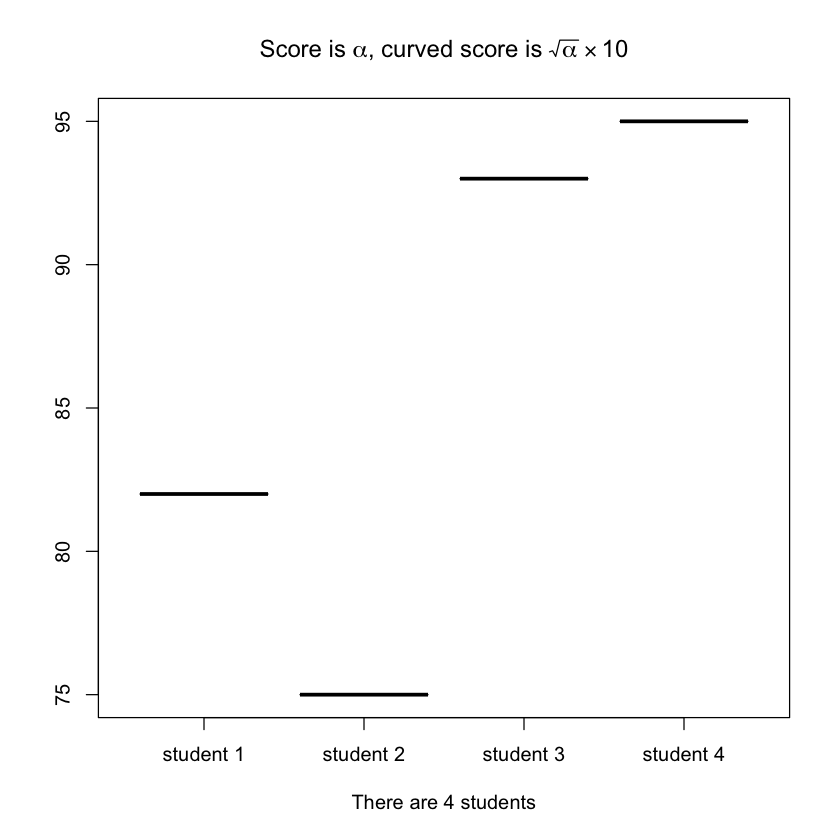

In [39]:
for (i in 1:4){
    df$student.no[i] <- paste("student", i)
    df$curved.score[i] <- round(sqrt(df$score[i]) * 10)
}
str(df)

n <- nrow(df)
plot(as.factor(df$student.no), df$curved.score,
     # Math symbols in text
     main = expression(paste("Score is ", alpha, ", curved score is ", sqrt(alpha)%*%10)),
     # Variable value in text
     xlab = paste("There are", n, "students"))

### 4.4.3 "Apply" family functions
Some say that apply( ) family functions distinguish R experts and newbies.
#### apply( )

In [40]:
df.scores <- df[, c("score", "curved.score")]; df.scores

score,curved.score
67,82
56,75
87,93
91,95


In [41]:
apply(df.scores, MARGIN = 2, FUN = mean)

score curved.score 
       75.25        86.25

In [42]:
apply(df.scores, MARGIN = 1, FUN = diff)   # diff() calculates the difference - see Section 4.4.4

[1] 15 19  6  4

In [43]:
myarray <- array(1:12, dim = c(2,3,2)); print(myarray)

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12



In [44]:
print(apply(myarray, MARGIN = c(2, 3), sum))

     [,1] [,2]
[1,]    3   15
[2,]    7   19
[3,]   11   23


#### sapply( )

In [45]:
sapply(df, is.numeric)

names        score   student.no curved.score 
       FALSE         TRUE        FALSE         TRUE

###### There is also lapply( ), tapply( ), etc...
###### And their parallel versions mclapply( ), parLapply( ) in the 'parallel' package for parallel computing.

### 4.4.4 Other useful functions

In [46]:
age=c(1,6,4,5,8,5,4,3)
weight=c(45,65,34)
age

[1] 1 6 4 5 8 5 4 3

In [47]:
mean(age)

[1] 4.5

In [48]:
prod(age)

[1] 57600

In [49]:
median(age)

[1] 4.5

In [50]:
var(age)
sd(age)

[1] 4.285714

[1] 2.070197

In [51]:
max(age)
min(age)
range(age)

[1] 8

[1] 1

[1] 1 8

In [52]:
which.max(age)   #returns the index of the greatest element of x
which.min(age)   #returns the index of the smallest element of x

[1] 5

[1] 1

In [53]:
seq(from = 0, to = 1, by = 0.25)
quantile(age, probs = seq(from = 0, to = 1, by = 0.25))
# Returns the specified quantiles.

[1] 0.00 0.25 0.50 0.75 1.00

0%  25%  50%  75% 100% 
1.00 3.75 4.50 5.25 8.00

In [54]:
unique(age)   # Gives the vector of distinct values

[1] 1 6 4 5 8 3

In [55]:
diff(age)   # Replaces a vector by the vector of first differences

[1]  5 -2  1  3 -3 -1 -1

In [56]:
sort(age)   # Sorts elements into order

[1] 1 3 4 4 5 5 6 8

In [57]:
age[order(age)]   # x[order(x)] orders elements of x

[1] 1 3 4 4 5 5 6 8

In [58]:
cumsum(age)   # Cumulative sums
cumprod(age)   # Cumulative products

[1]  1  7 11 16 24 29 33 36

[1]     1     6    24   120   960  4800 19200 57600

In [59]:
age
cat <- cut(age, breaks = 2); cat   # Divide continuous variable in factor with n levels
table(cat)   # Cross tabulation and table creation

[1] 1 6 4 5 8 5 4 3

[1] (0.993,4.5] (4.5,8.01]  (0.993,4.5] (4.5,8.01]  (4.5,8.01]  (4.5,8.01] 
[7] (0.993,4.5] (0.993,4.5]
Levels: (0.993,4.5] (4.5,8.01]

cat
(0.993,4.5]  (4.5,8.01] 
          4           4 

In [60]:
# Split the variable into categories
age.cat <- split(age, cut(age,2))
age.cat

$`(0.993,4.5]`
[1] 1 4 4 3

$`(4.5,8.01]`
[1] 6 5 8 5

In [61]:
# split() gives a list
str(age.cat)

List of 2
 $ (0.993,4.5]: num [1:4] 1 4 4 3
 $ (4.5,8.01] : num [1:4] 6 5 8 5


In [62]:
# lapply: list apply
lapply(age.cat, mean)

$`(0.993,4.5]`
[1] 3

$`(4.5,8.01]`
[1] 6

## 4.5 Write our own functions
- function( )

In [63]:
# The structure

func_name <- function(argument){
    statement
}

#### Write my own function of $x^y$:

In [64]:
X.to.the.power.of.Y <- function(y, x){
    x^y
}
X.to.the.power.of.Y(x = 3, y = 2)
X.to.the.power.of.Y(3, 2)     # Following a question in class, note the difference.

[1] 9

[1] 8

###### Uses:
- If we need to do some operation a lot later.
- Work with apply( ) family.
    - The 'FUN' argument in apply( ) family functions only take the name of the functions only.
    - No arguments, operators or combinations of these allowed.

###### Example: calculate the square of the score

In [65]:
df.scores

score,curved.score
67,82
56,75
87,93
91,95


In [66]:
# The following code does not work
# apply(df.scores, MARGIN = 2, FUN = ^2)

In [67]:
# Instead we can do
my.fun <- function(x){x^2}
apply(df.scores, MARGIN = 2, FUN = my.fun)

score,curved.score
4489,6724
3136,5625
7569,8649
8281,9025


###### Exercise: write our own function to calculate x %% y and x %/% y.

- Note how to return the output in function( ) and assess the results correspondingly.

In [68]:
# Two inputs, y and x, so two arguments

# Option 1 - use %% and %/% operators
modulus1 <- function(y, x){
    mod <- y %% x
    int.div <- y %/% x
    return(list(modulus=mod, integer.division=int.div))
}
out1 <- modulus1(y = 9, x = 2)
print(out1)
str(out1)

$modulus
[1] 1

$integer.division
[1] 4

List of 2
 $ modulus         : num 1
 $ integer.division: num 4


In [69]:
out1$modulus
out1$integer.division

[1] 1

[1] 4

In [70]:
# Option 2 - use trunc() or floor()

modulus2 <- function(y, x){
    mod <- trunc(y/x)     # or floor(y/x)
    int.div <- y - x * mod
    return(c(modulus=mod, integer.division=int.div))
}
out2 <- modulus2(9, 2)
print(out2)
str(out2)

         modulus integer.division 
               4                1 
 Named num [1:2] 4 1
 - attr(*, "names")= chr [1:2] "modulus" "integer.division"


In [71]:
out2[1]
out2[2]

modulus 
      4

integer.division 
               1

In [72]:
# Option 3 - use loops

modulus3 <- function(y, x){
    i <- 0
    while (y>=x){
        y <- y - x
        i <- i + 1
    }
    return(cat("modulus=", y, ", Integer division=", i)) # modulus
}

# I want modulus(y, x) to give me 'y mod x' for any integers y and x.
out3 <- modulus3(9, 2)

# Note that without printing out3, the result is already shown.

modulus= 1 , Integer division= 4